### Team 24- Question 3


### Import statements 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from sklearn.svm import SVC

In [2]:
import os
os.getcwd()
os.chdir('/home/achusanjeev/PRML_Data_Contest/PA2_Datasets')

### Class and function definitions

In [3]:
class Perceptron:
    
    def __init__(self, eta):
        self.eta = eta
        
    def f(self, s, beta = 100):
        return 1/(1+np.exp(-beta*s))
        
    def one_epoch(self, X, Y):
        w_old = self.w.copy()

        for t in range(X.shape[0]):
            xt = X[t, :]
            yt = Y[t]
            if yt*(np.dot(w_old, xt)) <= 0:
                w_new = w_old + self.eta*yt*xt 
            else:
                w_new = w_old
            w_old = w_new
        self.w = w_new
    
    def line(self, w, X):
        x = np.linspace(np.min(X[:, 1])-1 , np.max(X[:, 1])+1, 50)
        c = -w[0]/w[-1]
        m = -w[1]/w[-1]
        y = m*x + c
        return x,y 

    def predict(self, w, X):   
        Y_hat = np.zeros(X.shape[0])
        class_1 = np.argwhere(np.dot(X, w) >= 0)
        class_0 = np.argwhere(np.dot(X, w) < 0)
        Y_hat[class_1] = 1
        Y_hat[class_0] = -1
        return Y_hat   
        
    def accuracy(self, Y_true, Y_pred):
    # Returns the accuracy of predicted classes
    # Inputs:
    #     Y_true -----> True class labels
    #     Y_pred -----> Predicted class labels
    # Returns:
    #     tp/N -------> Accuracy of predicted class labels 

        tp = len(np.argwhere(Y_true==Y_pred))
        N  = Y_true.shape[0]
        return tp/N
   
    def train(self, X, Y, max_iter=1000):
        
        epoch = 0
        while epoch<max_iter:
            epoch += 1
            if epoch == 1:
                self.w =np.ones(X.shape[1])
                error_old = -10
            else:
                error_old = error_new
            self.one_epoch(X,Y)
            
            Y_hat = self.predict(self.w, X)
            error_new = 1 - self.accuracy(Y, Y_hat)
            print('Epoch: {0}, Error: {1}'.format(epoch, error_new))
            
            if error_new==0.0:
                print('Converged!!')
                break
        
            if abs(error_old-error_new)/(error_new) < 0.0001 and error_new < 0.01:
                print('Converged!!')
                break
            
        if epoch == max_iter:
            print('Did not converge!')             

In [4]:
def accuracy(Y_true, Y_pred):
    # Returns the accuracy of predicted classes
    # Inputs:
    #     Y_true -----> True class labels
    #     Y_pred -----> Predicted class labels
    # Returns:
    #     tp/N -------> Accuracy of predicted class labels 

        tp = len(np.argwhere((Y_true)==(Y_pred)))
        N  = Y_true.shape[0]
        return tp/N

## Dataset 1


In [5]:
data = pd.read_csv('Dataset_1/Dataset_1_Team_24.csv')
data.head()

,# x_1,x_2,Class_label
0,251.290678,-307.404235,1
1,313.403318,-270.377457,1
2,-302.947861,395.402585,0
3,270.918576,-318.853878,1
4,-286.806780,392.455625,0


In [6]:
data.columns = ['X1','X2', 'Y']

In [7]:
X = np.vstack((data[data.columns[0]].values, data[data.columns[1]].values)).T
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

np.random_seed = 10
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]] 

### Visualising the data

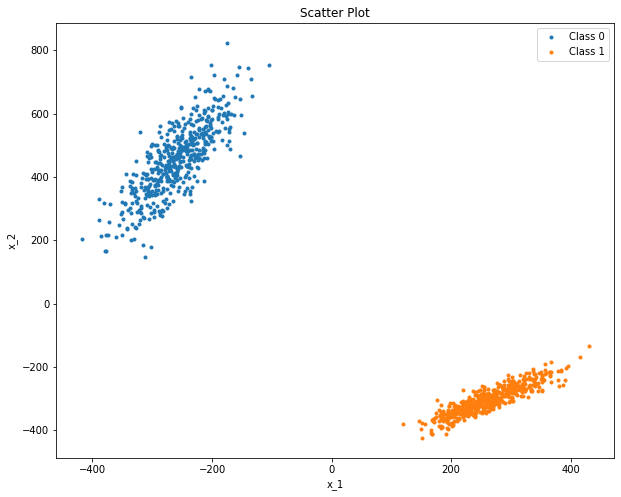

In [8]:
classes = np.unique(Y)

plt.figure(figsize = [10,8])
for c in classes:
    x_c = X[np.argwhere(Y==c).ravel(),:]
    plt.plot(x_c[:,0], x_c[:,1],'.')


plt.title('Scatter Plot')
plt.legend(['Class 0','Class 1'])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show() 

### Linear Kernel

In [9]:
# Appending with 1s
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [10]:
eta = 0.01         
nn = Perceptron(eta)
nn.train(X_train_a, Y_train)

Epoch: 1, Error: 0.0
Converged!!


In [11]:
Y_train_hat_lin = nn.predict(nn.w, X_train_a).astype(int)
Y_test_hat_lin = nn.predict(nn.w, X_test_a).astype(int)

In [12]:
accuracy_linear_train1 = accuracy(Y_train,Y_train_hat_lin)
accuracy_linear_test1 = accuracy(Y_test,Y_test_hat_lin)
print('Train Prediction Accuracy: {}'.format(accuracy_linear_train1))
print('Test Prediction Accuracy: {}'.format(accuracy_linear_test1))

Train Prediction Accuracy: 1.0
Test Prediction Accuracy: 1.0


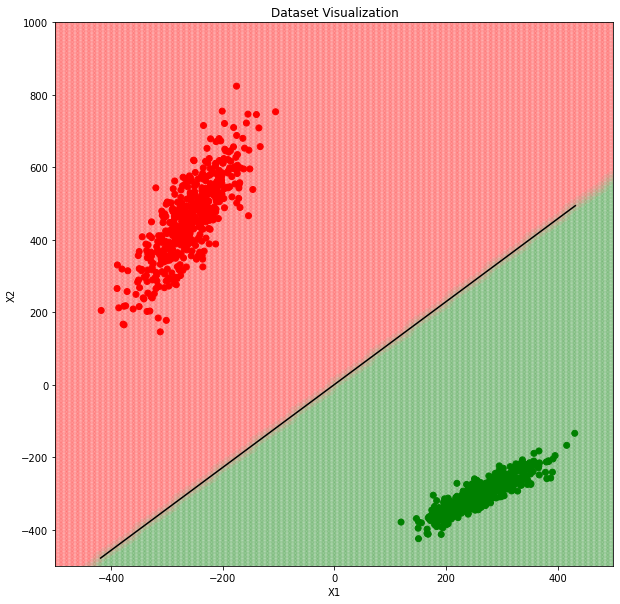

In [13]:
x_l, y_l = nn.line(nn.w, X_train_a)

# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-600, 600, 10), np.arange(-600, 1100, 10))
x_plot = np.c_[xx.ravel(), yy.ravel()]
x_plot = np.hstack((np.ones(x_plot.shape[0]).reshape(-1,1), x_plot))

plt.figure(figsize=[10,10])

cdict = {-1: 'red', 1: 'green'}

y_plot = nn.predict(nn.w, x_plot).astype(int)

plt.scatter(x_plot[:,1], x_plot[:,2], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.05)
plt.title("Dataset Visualization")
plt.xlim(left=-500, right =500)
plt.ylim(bottom=-500, top =1000)
plt.xlabel('X1')
plt.ylabel('X2')


plt.scatter(X[:,0],X[:,1], c = pd.Series(Y).apply(lambda x: cdict[x]))
plt.plot(x_l, y_l, '-k')
plt.title("Dataset Visualization")
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

### Polynomial Kernel

In [14]:
# Generating the polynomial features (Degree =2)
X = data.iloc[:,:2]
Y = data.iloc[:,2:]
X_poly = X.copy()

count = 3
for i in list(X.columns):
    for j in list(X.columns):
        if i == j:
            X_poly['X{}'.format(count)] = X[i]*X[j]
        else:
            X_poly['X{}'.format(count)] = np.sqrt(2) * X[i]*X[j]
        count = count + 1

In [15]:
X = X_poly.values
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

In [16]:
np.random_seed = 10
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]] 

In [17]:
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [18]:
eta = 0.01         
nn = Perceptron(eta)
nn.train(X_train_a, Y_train)

Epoch: 1, Error: 0.41625
Epoch: 2, Error: 0.5137499999999999
Epoch: 3, Error: 0.5137499999999999
Epoch: 4, Error: 0.5137499999999999
Epoch: 5, Error: 0.3225
Epoch: 6, Error: 0.44125000000000003
Epoch: 7, Error: 0.50875
Epoch: 8, Error: 0.5025
Epoch: 9, Error: 0.5137499999999999
Epoch: 10, Error: 0.5137499999999999
Epoch: 11, Error: 0.41000000000000003
Epoch: 12, Error: 0.5137499999999999
Epoch: 13, Error: 0.38125
Epoch: 14, Error: 0.4275
Epoch: 15, Error: 0.38125
Epoch: 16, Error: 0.47250000000000003
Epoch: 17, Error: 0.30125
Epoch: 18, Error: 0.5137499999999999
Epoch: 19, Error: 0.5137499999999999
Epoch: 20, Error: 0.42374999999999996
Epoch: 21, Error: 0.46375
Epoch: 22, Error: 0.49750000000000005
Epoch: 23, Error: 0.28625
Epoch: 24, Error: 0.41125
Epoch: 25, Error: 0.38125
Epoch: 26, Error: 0.4225
Epoch: 27, Error: 0.44625000000000004
Epoch: 28, Error: 0.5137499999999999
Epoch: 29, Error: 0.39125
Epoch: 30, Error: 0.5137499999999999
Epoch: 31, Error: 0.5137499999999999
Epoch: 32, Err

In [19]:
Y_train_hat_lin = nn.predict(nn.w, X_train_a).astype(int)
Y_test_hat_lin = nn.predict(nn.w, X_test_a).astype(int)

In [20]:
accuracy_poly_train1 = accuracy(Y_train,Y_train_hat_lin)
accuracy_poly_test1 = accuracy(Y_test,Y_test_hat_lin)
print('Train Prediction Accuracy: {}'.format(accuracy_poly_train1))
print('Test Prediction Accuracy: {}'.format(accuracy_poly_test1))

Train Prediction Accuracy: 0.99625
Test Prediction Accuracy: 1.0


In [21]:
# Creating a meshgrid and converting it into polynomial kernel so as to predict its class (DECISION BOUNDARY)
xx, yy = np.meshgrid(np.arange(-600, 600, 10), np.arange(-600, 1100, 10))
x_plot = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
x_plot.columns = ['X1','X2']
x_poly_plot = x_plot.copy()

count = 3
for i in list(x_plot.columns):
    for j in list(x_plot.columns):
        if i == j:
            x_poly_plot['X{}'.format(count)] = x_plot[i]*x_plot[j]
        else:
            x_poly_plot['X{}'.format(count)] = np.sqrt(2) * x_plot[i]* x_plot[j]
        count = count + 1
        
x_poly_plot = np.hstack((np.ones(x_poly_plot.shape[0]).reshape(-1,1), x_poly_plot))

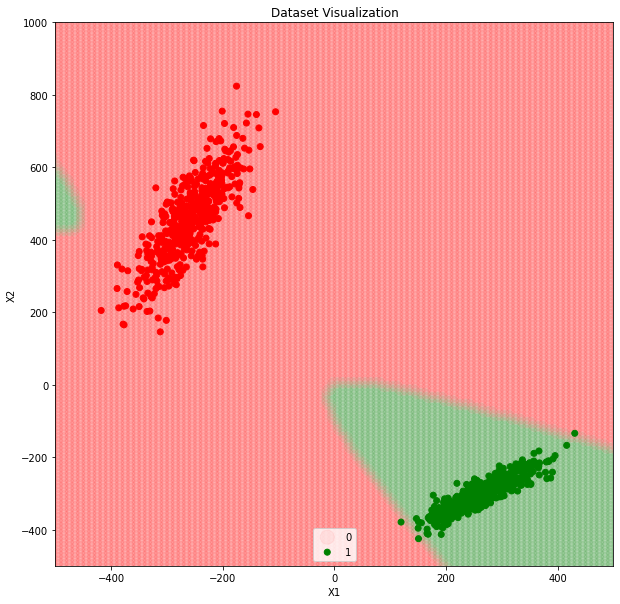

In [22]:
# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-600, 600, 10), np.arange(-600, 1100, 10))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {-1: 'red', 1: 'green'}

y_plot = nn.predict(nn.w, x_poly_plot).astype(int)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.05)
plt.title("Dataset Visualization")
plt.xlim(left=-500, right =500)
plt.ylim(bottom=-500, top =1000)
plt.xlabel('X1')
plt.ylabel('X2')


plt.scatter(X[:,0],X[:,1], c = pd.Series(Y).apply(lambda x: cdict[x]))
plt.title("Dataset Visualization")
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend(['0','1'])
plt.show()

### Tabulating the Results

In [23]:
Table = tabulate(
    [['Perceptron Based Classifier', 'Linear', accuracy_linear_train1 ,accuracy_linear_test1],
    ['', 'Polynomial(Degree=2)', accuracy_poly_train1 ,accuracy_poly_test1]],
    headers= ['Model', 'Kernel', 'Train Accuracy', 'Test Accuracy'], tablefmt='fancy_grid')   

In [38]:
print(Table)

╒═════════════════════════════╤══════════════════════╤══════════════════╤═════════════════╕
│ Model                       │ Kernel               │   Train Accuracy │   Test Accuracy │
╞═════════════════════════════╪══════════════════════╪══════════════════╪═════════════════╡
│ Perceptron Based Classifier │ Linear               │          1       │               1 │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial(Degree=2) │          0.99625 │               1 │
╘═════════════════════════════╧══════════════════════╧══════════════════╧═════════════════╛


## Dataset 3

In [39]:
data = pd.read_csv('Dataset_3/Dataset_3_Team_24.csv')
data.columns = ['X1','X2','Y']
data.head()

,X1,X2,Y
0,0.556383,-0.249476,1
1,-0.237175,0.534400,1
2,0.182019,-0.968976,0
3,-0.663934,0.777924,0
4,-0.855293,-0.272750,0


In [40]:
X = np.vstack((data[data.columns[0]].values, data[data.columns[1]].values)).T
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

np.random_seed = 10
X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]]

### Visualising the data

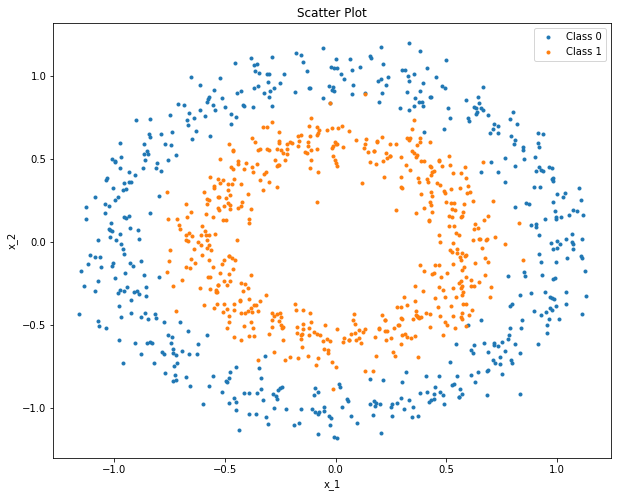

In [41]:
classes = np.unique(Y)

plt.figure(figsize = [10,8])
for c in classes:
    x_c = X[np.argwhere(Y==c).ravel(),:]
    plt.plot(x_c[:,0], x_c[:,1],'.')
    
plt.title('Scatter Plot')
plt.legend(['Class 0','Class 1'])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show() 

### Linear Kernel 

In [42]:
# Appending with 1s
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [43]:
eta = 0.01         
nn = Perceptron(eta)
nn.train(X_train_a, Y_train)

Epoch: 1, Error: 0.48375
Epoch: 2, Error: 0.49250000000000005
Epoch: 3, Error: 0.56125
Epoch: 4, Error: 0.48875
Epoch: 5, Error: 0.48750000000000004
Epoch: 6, Error: 0.57875
Epoch: 7, Error: 0.5900000000000001
Epoch: 8, Error: 0.49124999999999996
Epoch: 9, Error: 0.55375
Epoch: 10, Error: 0.48750000000000004
Epoch: 11, Error: 0.48624999999999996
Epoch: 12, Error: 0.49
Epoch: 13, Error: 0.48624999999999996
Epoch: 14, Error: 0.49
Epoch: 15, Error: 0.49
Epoch: 16, Error: 0.565
Epoch: 17, Error: 0.48875
Epoch: 18, Error: 0.48624999999999996
Epoch: 19, Error: 0.49
Epoch: 20, Error: 0.48875
Epoch: 21, Error: 0.48875
Epoch: 22, Error: 0.48750000000000004
Epoch: 23, Error: 0.485
Epoch: 24, Error: 0.48750000000000004
Epoch: 25, Error: 0.49
Epoch: 26, Error: 0.48750000000000004
Epoch: 27, Error: 0.49250000000000005
Epoch: 28, Error: 0.48375
Epoch: 29, Error: 0.48875
Epoch: 30, Error: 0.49250000000000005
Epoch: 31, Error: 0.49
Epoch: 32, Error: 0.49250000000000005
Epoch: 33, Error: 0.491249999999

Epoch: 276, Error: 0.48875
Epoch: 277, Error: 0.49
Epoch: 278, Error: 0.49
Epoch: 279, Error: 0.5549999999999999
Epoch: 280, Error: 0.48750000000000004
Epoch: 281, Error: 0.48624999999999996
Epoch: 282, Error: 0.48875
Epoch: 283, Error: 0.48624999999999996
Epoch: 284, Error: 0.49250000000000005
Epoch: 285, Error: 0.49
Epoch: 286, Error: 0.48750000000000004
Epoch: 287, Error: 0.48750000000000004
Epoch: 288, Error: 0.49250000000000005
Epoch: 289, Error: 0.49124999999999996
Epoch: 290, Error: 0.49250000000000005
Epoch: 291, Error: 0.49250000000000005
Epoch: 292, Error: 0.48750000000000004
Epoch: 293, Error: 0.48875
Epoch: 294, Error: 0.48375
Epoch: 295, Error: 0.49250000000000005
Epoch: 296, Error: 0.49
Epoch: 297, Error: 0.48624999999999996
Epoch: 298, Error: 0.48375
Epoch: 299, Error: 0.49
Epoch: 300, Error: 0.48624999999999996
Epoch: 301, Error: 0.49
Epoch: 302, Error: 0.48750000000000004
Epoch: 303, Error: 0.48875
Epoch: 304, Error: 0.49
Epoch: 305, Error: 0.49250000000000005
Epoch: 3

Epoch: 542, Error: 0.48750000000000004
Epoch: 543, Error: 0.49250000000000005
Epoch: 544, Error: 0.5800000000000001
Epoch: 545, Error: 0.48875
Epoch: 546, Error: 0.48875
Epoch: 547, Error: 0.48624999999999996
Epoch: 548, Error: 0.48624999999999996
Epoch: 549, Error: 0.49
Epoch: 550, Error: 0.48875
Epoch: 551, Error: 0.48624999999999996
Epoch: 552, Error: 0.48875
Epoch: 553, Error: 0.48375
Epoch: 554, Error: 0.49250000000000005
Epoch: 555, Error: 0.48875
Epoch: 556, Error: 0.48750000000000004
Epoch: 557, Error: 0.49
Epoch: 558, Error: 0.56375
Epoch: 559, Error: 0.49
Epoch: 560, Error: 0.485
Epoch: 561, Error: 0.48750000000000004
Epoch: 562, Error: 0.57375
Epoch: 563, Error: 0.48750000000000004
Epoch: 564, Error: 0.48624999999999996
Epoch: 565, Error: 0.49250000000000005
Epoch: 566, Error: 0.5862499999999999
Epoch: 567, Error: 0.48624999999999996
Epoch: 568, Error: 0.48750000000000004
Epoch: 569, Error: 0.48750000000000004
Epoch: 570, Error: 0.48750000000000004
Epoch: 571, Error: 0.49250

Epoch: 818, Error: 0.48750000000000004
Epoch: 819, Error: 0.48375
Epoch: 820, Error: 0.48750000000000004
Epoch: 821, Error: 0.5700000000000001
Epoch: 822, Error: 0.49250000000000005
Epoch: 823, Error: 0.49
Epoch: 824, Error: 0.48375
Epoch: 825, Error: 0.48875
Epoch: 826, Error: 0.48750000000000004
Epoch: 827, Error: 0.48875
Epoch: 828, Error: 0.48875
Epoch: 829, Error: 0.57875
Epoch: 830, Error: 0.49250000000000005
Epoch: 831, Error: 0.49124999999999996
Epoch: 832, Error: 0.57875
Epoch: 833, Error: 0.49124999999999996
Epoch: 834, Error: 0.48624999999999996
Epoch: 835, Error: 0.48624999999999996
Epoch: 836, Error: 0.48750000000000004
Epoch: 837, Error: 0.48875
Epoch: 838, Error: 0.48624999999999996
Epoch: 839, Error: 0.48875
Epoch: 840, Error: 0.49124999999999996
Epoch: 841, Error: 0.49250000000000005
Epoch: 842, Error: 0.49
Epoch: 843, Error: 0.49
Epoch: 844, Error: 0.49250000000000005
Epoch: 845, Error: 0.49
Epoch: 846, Error: 0.49
Epoch: 847, Error: 0.49
Epoch: 848, Error: 0.49
Epoch

In [44]:
Y_train_hat_lin = nn.predict(nn.w, X_train_a)
Y_test_hat_lin = nn.predict(nn.w, X_test_a)

In [45]:
accuracy_linear_train2 = accuracy(Y_train,Y_train_hat_lin)
accuracy_linear_test2 = accuracy(Y_test,Y_test_hat_lin)
print('Train Prediction Accuracy: {}'.format(accuracy_linear_train2))
print('Test Prediction Accuracy: {}'.format(accuracy_linear_test2))

Train Prediction Accuracy: 0.51625
Test Prediction Accuracy: 0.455


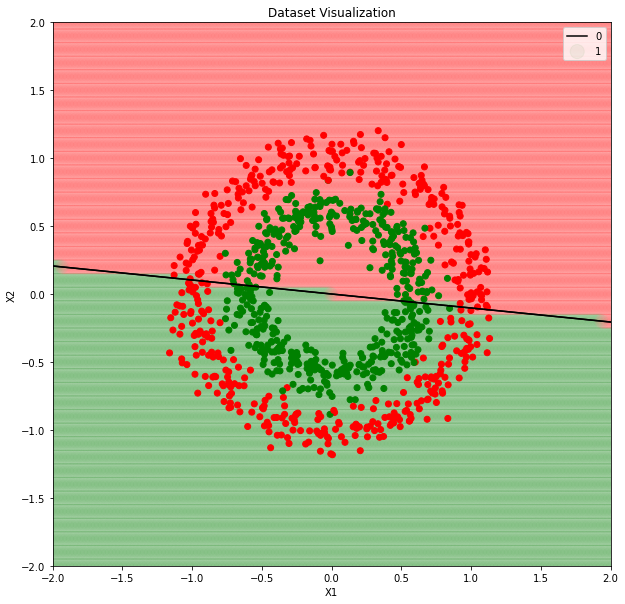

In [46]:
x_l, y_l = nn.line(nn.w, X_train_a)

# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-3, 3, 0.01), np.arange(-3, 3, 0.1))
x_plot = np.c_[xx.ravel(), yy.ravel()]
x_plot = np.hstack((np.ones(x_plot.shape[0]).reshape(-1,1), x_plot))

plt.figure(figsize=[10,10])

cdict = {-1: 'red', 1: 'green'}

y_plot = nn.predict(nn.w, x_plot).astype(int)

plt.scatter(x_plot[:,1], x_plot[:,2], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.05)

plt.title("Dataset Visualization")
plt.xlim(left=-2, right =2)
plt.ylim(bottom=-2, top =2)
plt.xlabel('X1')
plt.ylabel('X2')


plt.scatter(X[:,0],X[:,1], c = pd.Series(Y).apply(lambda x: cdict[x]))
plt.plot(x_l, y_l, '-k')
plt.title("Dataset Visualization")
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend(['0','1'])
plt.plot(x_l, y_l, '-k')


plt.show() 

### Polynomial Kernel

In [47]:
# Generating the polynomial features (Degree =2)
X = data.iloc[:,:2]
Y = data.iloc[:,2:]
X_poly = X.copy()

count = 3
for i in list(X.columns):
    for j in list(X.columns):
        if i == j:
            X_poly['X{}'.format(count)] = X[i]*X[j]
        else:
            X_poly['X{}'.format(count)] = np.sqrt(2) * X[i]*X[j]
        count = count + 1

In [48]:
X = X_poly.values
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

In [49]:
np.random_seed = 10
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]] 

In [50]:
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [51]:
eta = 0.01         
nn = Perceptron(eta)
nn.train(X_train_a, Y_train)

Epoch: 1, Error: 0.5275000000000001
Epoch: 2, Error: 0.026249999999999996
Epoch: 3, Error: 0.026249999999999996
Epoch: 4, Error: 0.02375000000000005
Epoch: 5, Error: 0.02749999999999997
Epoch: 6, Error: 0.028750000000000053
Epoch: 7, Error: 0.02375000000000005
Epoch: 8, Error: 0.020000000000000018
Epoch: 9, Error: 0.025000000000000022
Epoch: 10, Error: 0.02375000000000005
Epoch: 11, Error: 0.01749999999999996
Epoch: 12, Error: 0.025000000000000022
Epoch: 13, Error: 0.020000000000000018
Epoch: 14, Error: 0.01749999999999996
Epoch: 15, Error: 0.018750000000000044
Epoch: 16, Error: 0.01749999999999996
Epoch: 17, Error: 0.01749999999999996
Epoch: 18, Error: 0.02124999999999999
Epoch: 19, Error: 0.020000000000000018
Epoch: 20, Error: 0.020000000000000018
Epoch: 21, Error: 0.02124999999999999
Epoch: 22, Error: 0.02124999999999999
Epoch: 23, Error: 0.02124999999999999
Epoch: 24, Error: 0.02124999999999999
Epoch: 25, Error: 0.018750000000000044
Epoch: 26, Error: 0.02124999999999999
Epoch: 27, 

Epoch: 263, Error: 0.020000000000000018
Epoch: 264, Error: 0.020000000000000018
Epoch: 265, Error: 0.01749999999999996
Epoch: 266, Error: 0.01749999999999996
Epoch: 267, Error: 0.018750000000000044
Epoch: 268, Error: 0.01749999999999996
Epoch: 269, Error: 0.016249999999999987
Epoch: 270, Error: 0.018750000000000044
Epoch: 271, Error: 0.018750000000000044
Epoch: 272, Error: 0.018750000000000044
Epoch: 273, Error: 0.016249999999999987
Epoch: 274, Error: 0.018750000000000044
Epoch: 275, Error: 0.016249999999999987
Epoch: 276, Error: 0.018750000000000044
Epoch: 277, Error: 0.01749999999999996
Epoch: 278, Error: 0.01749999999999996
Epoch: 279, Error: 0.01749999999999996
Epoch: 280, Error: 0.01749999999999996
Epoch: 281, Error: 0.01749999999999996
Epoch: 282, Error: 0.01749999999999996
Epoch: 283, Error: 0.018750000000000044
Epoch: 284, Error: 0.02124999999999999
Epoch: 285, Error: 0.018750000000000044
Epoch: 286, Error: 0.020000000000000018
Epoch: 287, Error: 0.018750000000000044
Epoch: 288

Epoch: 478, Error: 0.018750000000000044
Epoch: 479, Error: 0.02124999999999999
Epoch: 480, Error: 0.018750000000000044
Epoch: 481, Error: 0.020000000000000018
Epoch: 482, Error: 0.01749999999999996
Epoch: 483, Error: 0.020000000000000018
Epoch: 484, Error: 0.020000000000000018
Epoch: 485, Error: 0.026249999999999996
Epoch: 486, Error: 0.01749999999999996
Epoch: 487, Error: 0.020000000000000018
Epoch: 488, Error: 0.018750000000000044
Epoch: 489, Error: 0.01749999999999996
Epoch: 490, Error: 0.020000000000000018
Epoch: 491, Error: 0.018750000000000044
Epoch: 492, Error: 0.018750000000000044
Epoch: 493, Error: 0.020000000000000018
Epoch: 494, Error: 0.018750000000000044
Epoch: 495, Error: 0.018750000000000044
Epoch: 496, Error: 0.01749999999999996
Epoch: 497, Error: 0.01749999999999996
Epoch: 498, Error: 0.026249999999999996
Epoch: 499, Error: 0.02124999999999999
Epoch: 500, Error: 0.03249999999999997
Epoch: 501, Error: 0.02124999999999999
Epoch: 502, Error: 0.02375000000000005
Epoch: 503

Epoch: 697, Error: 0.025000000000000022
Epoch: 698, Error: 0.018750000000000044
Epoch: 699, Error: 0.018750000000000044
Epoch: 700, Error: 0.018750000000000044
Epoch: 701, Error: 0.01749999999999996
Epoch: 702, Error: 0.018750000000000044
Epoch: 703, Error: 0.018750000000000044
Epoch: 704, Error: 0.018750000000000044
Epoch: 705, Error: 0.01749999999999996
Epoch: 706, Error: 0.018750000000000044
Epoch: 707, Error: 0.018750000000000044
Epoch: 708, Error: 0.01749999999999996
Epoch: 709, Error: 0.018750000000000044
Epoch: 710, Error: 0.01749999999999996
Epoch: 711, Error: 0.016249999999999987
Epoch: 712, Error: 0.022499999999999964
Epoch: 713, Error: 0.01749999999999996
Epoch: 714, Error: 0.018750000000000044
Epoch: 715, Error: 0.026249999999999996
Epoch: 716, Error: 0.018750000000000044
Epoch: 717, Error: 0.01749999999999996
Epoch: 718, Error: 0.020000000000000018
Epoch: 719, Error: 0.018750000000000044
Epoch: 720, Error: 0.020000000000000018
Epoch: 721, Error: 0.030000000000000027
Epoch:

Epoch: 910, Error: 0.020000000000000018
Epoch: 911, Error: 0.025000000000000022
Epoch: 912, Error: 0.018750000000000044
Epoch: 913, Error: 0.018750000000000044
Epoch: 914, Error: 0.018750000000000044
Epoch: 915, Error: 0.020000000000000018
Epoch: 916, Error: 0.020000000000000018
Epoch: 917, Error: 0.01749999999999996
Epoch: 918, Error: 0.01749999999999996
Epoch: 919, Error: 0.018750000000000044
Epoch: 920, Error: 0.018750000000000044
Epoch: 921, Error: 0.020000000000000018
Epoch: 922, Error: 0.018750000000000044
Epoch: 923, Error: 0.018750000000000044
Epoch: 924, Error: 0.02124999999999999
Epoch: 925, Error: 0.018750000000000044
Epoch: 926, Error: 0.02124999999999999
Epoch: 927, Error: 0.022499999999999964
Epoch: 928, Error: 0.018750000000000044
Epoch: 929, Error: 0.022499999999999964
Epoch: 930, Error: 0.018750000000000044
Epoch: 931, Error: 0.02375000000000005
Epoch: 932, Error: 0.018750000000000044
Epoch: 933, Error: 0.022499999999999964
Epoch: 934, Error: 0.020000000000000018
Epoch

In [52]:
Y_train_hat_lin = nn.predict(nn.w, X_train_a).astype(int)
Y_test_hat_lin = nn.predict(nn.w, X_test_a).astype(int)

In [53]:
accuracy_poly_train2 = accuracy(Y_train,Y_train_hat_lin)
accuracy_poly_test2 = accuracy(Y_test,Y_test_hat_lin)
print('Train Prediction Accuracy: {}'.format(accuracy_poly_train2))
print('Test Prediction Accuracy: {}'.format(accuracy_poly_test2))

Train Prediction Accuracy: 0.975
Test Prediction Accuracy: 0.995


In [54]:
# Creating a meshgrid and converting it into polynomial kernel so as to predict its class (DECISION BOUNDARY)
xx, yy = np.meshgrid(np.arange(-3, 3, 0.01), np.arange(-3, 3, 0.01))
x_plot = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
x_plot.columns = ['X1','X2']
x_poly_plot = x_plot.copy()

count = 3
for i in list(x_plot.columns):
    for j in list(x_plot.columns):
        if i == j:
            x_poly_plot['X{}'.format(count)] = x_plot[i]*x_plot[j]
        else:
            x_poly_plot['X{}'.format(count)] = np.sqrt(2) * x_plot[i]* x_plot[j]
        count = count + 1
        
x_poly_plot = np.hstack((np.ones(x_poly_plot.shape[0]).reshape(-1,1), x_poly_plot))

/home/achusanjeev/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/achusanjeev/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/achusanjeev/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/achusanjeev/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/achusanjeev/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be 

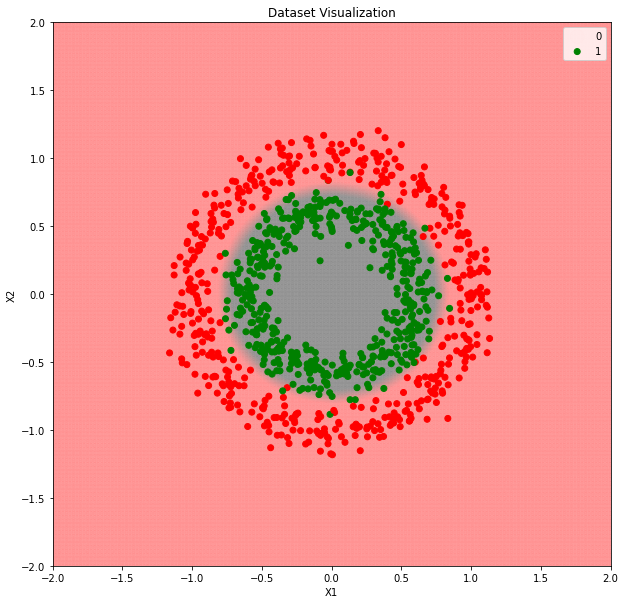

In [55]:
# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-3, 3, 0.01), np.arange(-3, 3, 0.01))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {-1: 'red', 1: 'green'}

y_plot = nn.predict(nn.w, x_poly_plot).astype(int)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.005)
plt.title("Dataset Visualization")
plt.xlim(left=-2, right =2)
plt.ylim(bottom=-2, top =2)
plt.xlabel('X1')
plt.ylabel('X2')


plt.scatter(X[:,0],X[:,1], c = pd.Series(Y).apply(lambda x: cdict[x]))
plt.title("Dataset Visualization")
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend(['0','1'])
plt.show()

### Tabulating the Results

In [56]:
Table = tabulate(
    [['Perceptron Based Classifier', 'Linear', accuracy_linear_train2 ,accuracy_linear_test2],
    ['', 'Polynomial(Degree=2)', accuracy_poly_train2 ,accuracy_poly_test2]],
    headers= ['Model', 'Kernel', 'Train Accuracy', 'Test Accuracy'], tablefmt='fancy_grid')   

In [57]:
print(Table)

╒═════════════════════════════╤══════════════════════╤══════════════════╤═════════════════╕
│ Model                       │ Kernel               │   Train Accuracy │   Test Accuracy │
╞═════════════════════════════╪══════════════════════╪══════════════════╪═════════════════╡
│ Perceptron Based Classifier │ Linear               │          0.51625 │           0.455 │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial(Degree=2) │          0.975   │           0.995 │
╘═════════════════════════════╧══════════════════════╧══════════════════╧═════════════════╛


## Comparing both the models with Hard Margin SVMs

### DATASET 1

### Linear Kernel

In [98]:
data = pd.read_csv('Dataset_1/Dataset_1_Team_24.csv')
data.head()
data.columns = ['X1','X2', 'Y']

In [99]:
X = data.drop('Y',axis=1)
y = data['Y']

In [100]:
# Train test split
np.random_seed = 10

N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X.loc[order[:train_N],:]
y_train = y[order[:train_N]]
X_test = X.loc[order[train_N:],:]
y_test = y[order[train_N:]] 

In [101]:
# Since we are using hard margin SVM, we will set C to an extremely large value.

In [102]:
model = SVC(C=1000, kernel='linear').fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [103]:
# Getting train and test accuracy
accuracy_svm_train1 = accuracy(y_train, y_train_pred)
accuracy_svm_test1 = accuracy(y_test,y_test_pred)
print('Train Prediction Accuracy: {}'.format(accuracy_svm_train1))
print('Test Prediction Accuracy: {}'.format(accuracy_svm_test1))

Train Prediction Accuracy: 1.0
Test Prediction Accuracy: 1.0


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


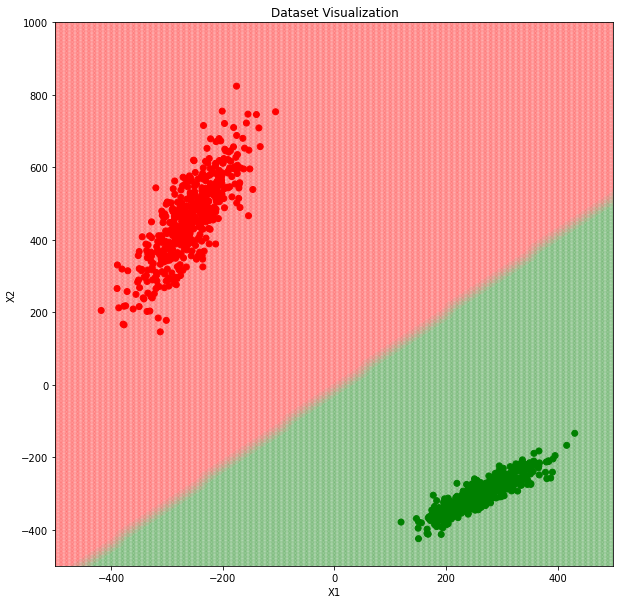

In [104]:
# Plotting the decision boundary

xx, yy = np.meshgrid(np.arange(-600, 600, 10), np.arange(-600, 1100, 10))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = model.predict(x_plot)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.05)
plt.title("Dataset Visualization")
plt.xlim(left=-500, right =500)
plt.ylim(bottom=-500, top =1000)
plt.xlabel('X1')
plt.ylabel('X2')


plt.scatter(X.iloc[:,0],X.iloc[:,1], c = pd.Series(y).apply(lambda x: cdict[x]))
plt.title("Dataset Visualization")
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

### Polynomial Kernel (Degree = 2)

In [105]:
# Since we are using hard margin SVM, we will set C to an extremely large value.

In [106]:
model = SVC(C=1000, kernel = 'poly', degree = 2).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

/home/achusanjeev/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [107]:
# Getting train and test accuracy
accuracy_svm_train2 = accuracy(y_train, y_train_pred)
accuracy_svm_test2 = accuracy(y_test,y_test_pred)
print('Train Prediction Accuracy: {}'.format(accuracy_svm_train2))
print('Test Prediction Accuracy: {}'.format(accuracy_svm_test2))

Train Prediction Accuracy: 0.93625
Test Prediction Accuracy: 0.945


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


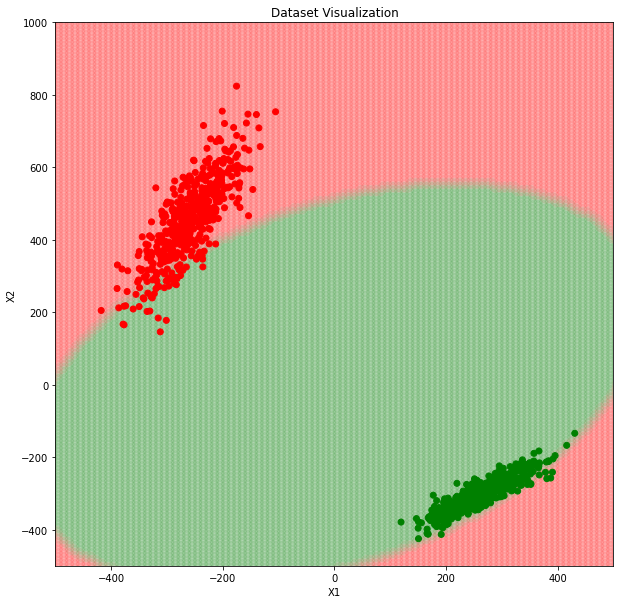

In [108]:
# Plotting the decision boundary

xx, yy = np.meshgrid(np.arange(-600, 600, 10), np.arange(-600, 1100, 10))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = model.predict(x_plot)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.05)
plt.title("Dataset Visualization")
plt.xlim(left=-500, right =500)
plt.ylim(bottom=-500, top =1000)
plt.xlabel('X1')
plt.ylabel('X2')


plt.scatter(X.iloc[:,0],X.iloc[:,1], c = pd.Series(y).apply(lambda x: cdict[x]))
plt.title("Dataset Visualization")
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

### DATASET 3

### Linear Kernel

In [109]:
data = pd.read_csv('Dataset_3/Dataset_3_Team_24.csv')
data.head()
data.columns = ['X1','X2', 'Y']

In [110]:
X = data.drop('Y',axis=1)
y = data['Y']

In [111]:
# Train test split
np.random_seed = 10

N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X.loc[order[:train_N],:]
y_train = y[order[:train_N]]
X_test = X.loc[order[train_N:],:]
y_test = y[order[train_N:]] 

In [112]:
# Since we are using hard margin SVM, we will set C to an extremely large value.

In [113]:
model = SVC(C=1000,kernel='linear').fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [114]:
# Getting train and test accuracy
accuracy_svm_train3 = accuracy(y_train, y_train_pred)
accuracy_svm_test3 = accuracy(y_test,y_test_pred)
print('Train Prediction Accuracy: {}'.format(accuracy_svm_train3))
print('Test Prediction Accuracy: {}'.format(accuracy_svm_test3))

Train Prediction Accuracy: 0.53625
Test Prediction Accuracy: 0.49


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


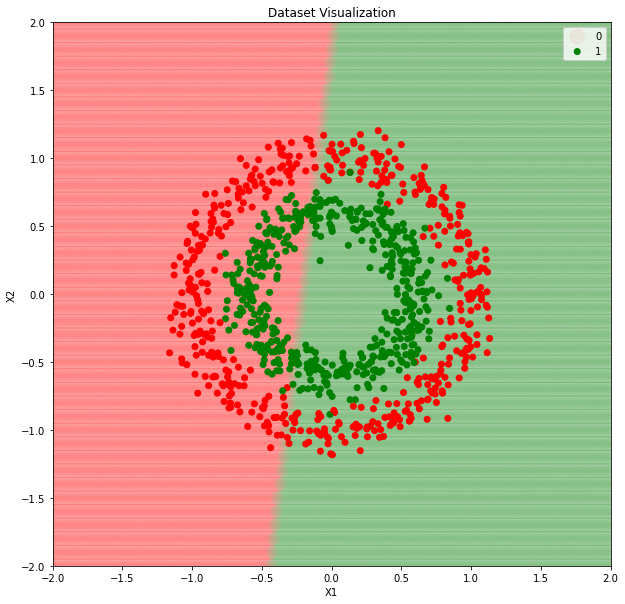

In [115]:
# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-3, 3, 0.01), np.arange(-3, 3, 0.1))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = model.predict(x_plot).astype(int)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.05)

plt.title("Dataset Visualization")
plt.xlim(left=-2, right =2)
plt.ylim(bottom=-2, top =2)
plt.xlabel('X1')
plt.ylabel('X2')


plt.scatter(X.iloc[:,0],X.iloc[:,1], c = pd.Series(y).apply(lambda x: cdict[x]))
plt.title("Dataset Visualization")
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend(['0','1'])


plt.show() 

### Polynomial Kernel (Degree = 2)

In [116]:
# Since we are using hard margin SVM, we will set C to an extremely large value.

In [117]:
model = SVC(C=1000, kernel = 'poly', degree = 2).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

/home/achusanjeev/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [118]:
# Getting train and test accuracy
accuracy_svm_train4 = accuracy(y_train, y_train_pred)
accuracy_svm_test4 = accuracy(y_test,y_test_pred)
print('Train Prediction Accuracy: {}'.format(accuracy_svm_train4))
print('Test Prediction Accuracy: {}'.format(accuracy_svm_test4))

Train Prediction Accuracy: 0.98375
Test Prediction Accuracy: 0.99


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


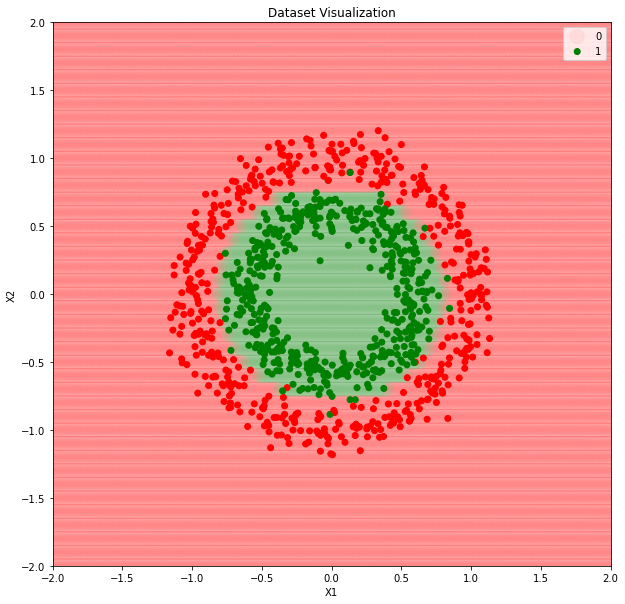

In [119]:
# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-3, 3, 0.01), np.arange(-3, 3, 0.1))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = model.predict(x_plot).astype(int)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.05)

plt.title("Dataset Visualization")
plt.xlim(left=-2, right =2)
plt.ylim(bottom=-2, top =2)
plt.xlabel('X1')
plt.ylabel('X2')


plt.scatter(X.iloc[:,0],X.iloc[:,1], c = pd.Series(y).apply(lambda x: cdict[x]))
plt.title("Dataset Visualization")
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend(['0','1'])


plt.show() 

### Table of classification accuracy on the train and test data for both the kernels on boththe above datasets

In [120]:
Table = tabulate(
    [['Perceptron Based Classifier', 'Linear', accuracy_linear_train1 ,accuracy_linear_test1],
    ['', 'Polynomial(Degree=2)', accuracy_poly_train1 ,accuracy_poly_test1],
    ['SVM ', 'Linear', accuracy_svm_train1 ,accuracy_svm_test1],
    ['', 'Polynomial', accuracy_svm_train2 ,accuracy_svm_test2]],
    headers= ['DATASET1', 'Kernel', 'Train Accuracy', 'Test Accuracy'], tablefmt='fancy_grid')    

In [121]:
print(Table)

╒═════════════════════════════╤══════════════════════╤══════════════════╤═════════════════╕
│ DATASET1                    │ Kernel               │   Train Accuracy │   Test Accuracy │
╞═════════════════════════════╪══════════════════════╪══════════════════╪═════════════════╡
│ Perceptron Based Classifier │ Linear               │          1       │           1     │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial(Degree=2) │          0.99625 │           1     │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│ SVM                         │ Linear               │          1       │           1     │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial           │          0.93625 │           0.945 │
╘═════════════════════════════╧══════════════════════╧══════════════════╧═══════

In [122]:
Table = tabulate(
    [['Perceptron Based Classifier', 'Linear', accuracy_linear_train2 ,accuracy_linear_test2],
    ['', 'Polynomial(Degree=2)', accuracy_poly_train2 ,accuracy_poly_test2],
    ['SVM ', 'Linear', accuracy_svm_train3 ,accuracy_svm_test3],
    ['', 'Polynomial', accuracy_svm_train4 ,accuracy_svm_test4]],
    headers= ['DATASET3', 'Kernel', 'Train Accuracy', 'Test Accuracy'], tablefmt='fancy_grid')   

In [123]:
print(Table)

╒═════════════════════════════╤══════════════════════╤══════════════════╤═════════════════╕
│ DATASET3                    │ Kernel               │   Train Accuracy │   Test Accuracy │
╞═════════════════════════════╪══════════════════════╪══════════════════╪═════════════════╡
│ Perceptron Based Classifier │ Linear               │          0.51625 │           0.455 │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial(Degree=2) │          0.975   │           0.995 │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│ SVM                         │ Linear               │          0.53625 │           0.49  │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial           │          0.98375 │           0.99  │
╘═════════════════════════════╧══════════════════════╧══════════════════╧═══════

### Compare the performance of Perceptron for both kernels across the two datasets andexplain your observations.  In particular,  compare the convergence behaviour as afunction of the number of iterations. Compare the number of iterations of Perceptronagainst the theoretical bound.

Please try to fill here

### Interpret your results. Which was the best kernel for each dataset? Why?

From the accuracy scores, we can directly make some conclusions.

Dataset 1 is linearly separable, hence a linear kernel is the best. The linear kernel gives 100% accuracy here, since the datapoints are well seperated as well. The polynomial kernel also works here, but due to the shape of the decision boundary, a few points are misclassified. It also leads to a little amount of overfitting

Dataset 3 is not linearly separable, hence clearly the polynomial kernel is better. Linear kernels perform very poorly here since a straight line cannot classify both the classes.

### Compare the results obtained from Perceptron for both kernels against that of hardmargin SVMs across the two datasets.

Here, we are comparing Perceptron and hard margin SVM. 
Firstly, hard margin SVMs are such that there is a very small margin of classification, hence it tries to make it such that not a single point is misclassified.

Dataset 1 being linearly separable and VERY FAR APART, the hard margin SVM is also able to classify to obtain an accuracy of 100% for both train and test. Again, the fact that both the classes are well separated results in both the models performing easily well (in the case of linear kernels).
In the case of polynomial kernels, the perceptron performs much better since the hard margin SVM takes a very thin margin of separation and hence misclassifies a few points near the boundary.

Dataset 2 is not linearly separable, so the linear kernels perform equally bad in the case of both perceptron and SVM, and there is not much point comparing these since, the classification is altogether incorrect.
In the case of polynomial kernels, the hard margin SVM performs slightly better here, since the points are well separable and the hard margin ensures that very few points are misclassified.